In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import re
import gc

In [2]:
# The directory where your files are
directory = 'C:/Users/August Liu/Capstone BL/CurrentUseVacant'

# Columns to import only once
once_columns = ["Parcel ID", "Address", "Current Use", "USPS Vacancy", "Adjudicated Property"]

# Load and process the first file
print(f'Processing tolemi-CurrentuseVacant2015.csv')
file_path = os.path.join(directory, "tolemi-CurrentuseVacant2015.csv")

# Load the first file
final_df = pd.read_csv(file_path, skiprows=4)

# Clean the "Parcel ID" column
final_df['Parcel ID'] = final_df['Parcel ID'].map(lambda x: x.lstrip('="').rstrip('"'))

# Remove rows where "Parcel ID" is '0' or '00', etc.
final_df = final_df[~final_df['Parcel ID'].isin(['00000'])]

# Replace NaN with 0
final_df.fillna(0, inplace=True)

# Ensure that "Parcel ID" column is of the same data type in all DataFrames
final_df['Parcel ID'] = final_df['Parcel ID'].astype(str)

# Drop the "Blight Service Calls" column for the 2015 data
if "Blight Service Calls - Count - Between 01-01-2016 and 01-01-2016" in final_df.columns:
    final_df = final_df.drop(columns=["Blight Service Calls - Count - Between 01-01-2016 and 01-01-2016"])

final_df

Processing tolemi-CurrentuseVacant2015.csv


,Parcel ID,Address,Current Use,USPS Vacancy,Adjudicated Property,Fire Incidents - Count - Between 01-01-2015 and 12-31-2015,Police Incidents - Count - Between 01-01-2015 and 12-31-2015,Calls for Service - Count - Between 01-01-2015 and 12-31-2015
0,43257,"700 SCENIC HWY, Baton Rouge, LA",VACANT,Not Vacant,Unknown,0.0,0.0,0.0
1,1248057,"12174 LEONIDAS ST, Baton Rouge, LA",VACANT,Unavailable,Unknown,0.0,0.0,0.0
2,775169,"974 W ROOSEVELT ST, Baton Rouge, LA",VACANT,Unavailable,Unknown,0.0,0.0,0.0
3,1757458,"2861 BRIGHTSIDE DR, Baton Rouge, LA",VACANT,Unavailable,Unknown,0.0,0.0,0.0
4,406937,"1300 N 38TH ST, Baton Rouge, LA",VACANT,Unavailable,Unknown,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
2428,1123890,"8675 SCENIC HWY, Baton Rouge, LA",VACANT,Unavailable,Unknown,0.0,0.0,0.0
2429,782041,"1711 NICHOLSON DR, Baton Rouge, LA",VACANT,Unavailable,Unknown,0.0,0.0,0.0
2430,54275,"Address Unknown, Baton Rouge, LA",VACANT,Unavailable,Unknown,0.0,0.0,0.0
2431,703796,"1775 EDDIE ROBINSON SR DR, Baton Rouge, LA",VACANT,Unavailable,Yes,0.0,0.0,0.0


In [3]:
filtered_rows = final_df[final_df['Parcel ID'] == '00000']
filtered_rows

,Parcel ID,Address,Current Use,USPS Vacancy,Adjudicated Property,Fire Incidents - Count - Between 01-01-2015 and 12-31-2015,Police Incidents - Count - Between 01-01-2015 and 12-31-2015,Calls for Service - Count - Between 01-01-2015 and 12-31-2015


In [4]:
# Process each other file
for filename in sorted(os.listdir(directory)):
    if filename.startswith("tolemi-CurrentuseVacant") and filename.endswith(".csv") and filename != "tolemi-CurrentuseVacant2015.csv":
        print(f'Processing {filename}')
        file_path = os.path.join(directory, filename)

        # Load the file
        df = pd.read_csv(file_path, skiprows=4)

        # Clean the "Parcel ID" column
        df['Parcel ID'] = df['Parcel ID'].map(lambda x: x.lstrip('="').rstrip('"'))

        # Remove rows where "Parcel ID" is '0' or '00', etc.
        df = df[~df['Parcel ID'].isin(['00000'])]

        # Replace NaN with 0
        df.fillna(0, inplace=True)

        # Ensure that "Parcel ID" column is of the same data type in all DataFrames
        df['Parcel ID'] = df['Parcel ID'].astype(str)

        # Columns to import from every file
        year = filename[-8:-4]  # extract year from filename
        every_file_columns = [
            f"Fire Incidents - Count - Between 01-01-{year} and 12-31-{year}",
            f"Police Incidents - Count - Between 01-01-{year} and 12-31-{year}",
            f"Blight Service Calls - Count - Between 01-01-{year} and 12-31-{year}",
            f"Calls for Service - Count - Between 01-01-{year} and 12-31-{year}"
        ]

        # Merge the DataFrame
        final_df = pd.merge(final_df, df[["Parcel ID"] + every_file_columns], on="Parcel ID", how='left')

        # Delete the DataFrame to free up memory
        del df
        gc.collect()


Processing tolemi-CurrentuseVacant2016.csv
Processing tolemi-CurrentuseVacant2017.csv
Processing tolemi-CurrentuseVacant2018.csv
Processing tolemi-CurrentuseVacant2019.csv
Processing tolemi-CurrentuseVacant2020.csv
Processing tolemi-CurrentuseVacant2021.csv
Processing tolemi-CurrentuseVacant2022.csv
Processing tolemi-CurrentuseVacant2023.csv


In [5]:
final_df

,Parcel ID,Address,Current Use,USPS Vacancy,Adjudicated Property,Fire Incidents - Count - Between 01-01-2015 and 12-31-2015,Police Incidents - Count - Between 01-01-2015 and 12-31-2015,Calls for Service - Count - Between 01-01-2015 and 12-31-2015,Fire Incidents - Count - Between 01-01-2016 and 12-31-2016,Police Incidents - Count - Between 01-01-2016 and 12-31-2016,...,Blight Service Calls - Count - Between 01-01-2021 and 12-31-2021,Calls for Service - Count - Between 01-01-2021 and 12-31-2021,Fire Incidents - Count - Between 01-01-2022 and 12-31-2022,Police Incidents - Count - Between 01-01-2022 and 12-31-2022,Blight Service Calls - Count - Between 01-01-2022 and 12-31-2022,Calls for Service - Count - Between 01-01-2022 and 12-31-2022,Fire Incidents - Count - Between 01-01-2023 and 12-31-2023,Police Incidents - Count - Between 01-01-2023 and 12-31-2023,Blight Service Calls - Count - Between 01-01-2023 and 12-31-2023,Calls for Service - Count - Between 01-01-2023 and 12-31-2023
0,43257,"700 SCENIC HWY, Baton Rouge, LA",VACANT,Not Vacant,Unknown,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1248057,"12174 LEONIDAS ST, Baton Rouge, LA",VACANT,Unavailable,Unknown,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,775169,"974 W ROOSEVELT ST, Baton Rouge, LA",VACANT,Unavailable,Unknown,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,1757458,"2861 BRIGHTSIDE DR, Baton Rouge, LA",VACANT,Unavailable,Unknown,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0
4,406937,"1300 N 38TH ST, Baton Rouge, LA",VACANT,Unavailable,Unknown,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2333,1123890,"8675 SCENIC HWY, Baton Rouge, LA",VACANT,Unavailable,Unknown,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2334,782041,"1711 NICHOLSON DR, Baton Rouge, LA",VACANT,Unavailable,Unknown,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2335,54275,"Address Unknown, Baton Rouge, LA",VACANT,Unavailable,Unknown,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2336,703796,"1775 EDDIE ROBINSON SR DR, Baton Rouge, LA",VACANT,Unavailable,Yes,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
# Common columns
common_columns = ["Parcel ID", "Address", "Current Use", "USPS Vacancy", "Adjudicated Property"]

# Create Fire incidents DataFrame
fire_columns = [col for col in final_df.columns if 'Fire Incidents' in col]
df_fire = final_df[common_columns + fire_columns]

# For the fire DataFrame
df_fire.loc['Total', fire_columns] = df_fire[fire_columns].sum()

# For the fire DataFrame
df_fire['Total Fire Incidents'] = df_fire[fire_columns].sum(axis=1)

df_fire

C:\Users\August Liu\AppData\Local\Temp\ipykernel_19580\3533466622.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fire.loc['Total', fire_columns] = df_fire[fire_columns].sum()


,Parcel ID,Address,Current Use,USPS Vacancy,Adjudicated Property,Fire Incidents - Count - Between 01-01-2015 and 12-31-2015,Fire Incidents - Count - Between 01-01-2016 and 12-31-2016,Fire Incidents - Count - Between 01-01-2017 and 12-31-2017,Fire Incidents - Count - Between 01-01-2018 and 12-31-2018,Fire Incidents - Count - Between 01-01-2019 and 12-31-2019,Fire Incidents - Count - Between 01-01-2020 and 12-31-2020,Fire Incidents - Count - Between 01-01-2021 and 12-31-2021,Fire Incidents - Count - Between 01-01-2022 and 12-31-2022,Fire Incidents - Count - Between 01-01-2023 and 12-31-2023,Total Fire Incidents
0,43257,"700 SCENIC HWY, Baton Rouge, LA",VACANT,Not Vacant,Unknown,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0
1,1248057,"12174 LEONIDAS ST, Baton Rouge, LA",VACANT,Unavailable,Unknown,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,775169,"974 W ROOSEVELT ST, Baton Rouge, LA",VACANT,Unavailable,Unknown,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1757458,"2861 BRIGHTSIDE DR, Baton Rouge, LA",VACANT,Unavailable,Unknown,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,406937,"1300 N 38TH ST, Baton Rouge, LA",VACANT,Unavailable,Unknown,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2334,782041,"1711 NICHOLSON DR, Baton Rouge, LA",VACANT,Unavailable,Unknown,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2335,54275,"Address Unknown, Baton Rouge, LA",VACANT,Unavailable,Unknown,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2336,703796,"1775 EDDIE ROBINSON SR DR, Baton Rouge, LA",VACANT,Unavailable,Yes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2337,1190938,"9838 AVE, Baton Rouge, LA",VACANT,Unavailable,Unknown,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
df_fire.to_csv('fire_count.csv', index=False)

In [8]:
# Calculate the cost for each year
start_year = 2015
end_year = 2023
start_hourly_rate = 34.30
annual_growth_rate = 0.0149

# Define a dictionary to map the old column names to the new ones
column_mapping = {name: name.replace('Count', 'Conservative cost') for name in df_fire.columns if 'Fire Incidents - Count -' in name}
df_firecost_Conservative = df_fire.rename(columns=column_mapping)

for year in range(start_year, end_year + 1):
    column_name = f'Fire Incidents - Conservative cost - Between 01-01-{year} and 12-31-{year}'
    hourly_rate = start_hourly_rate * ((1 + annual_growth_rate) ** (year - start_year))
    df_firecost_Conservative[column_name] *= 60.618548 / 60 * hourly_rate  # note that this is in-place operation
    
# Initialize a new column with zeros
df_firecost_Conservative['Total Conservative Fire Costs'] = 0

df_firecost_Conservative = df_firecost_Conservative.drop(columns=["Total Fire Incidents"])
df_firecost_Conservative['Total Conservative Fire Costs'] = df_firecost_Conservative.filter(like='Fire Incidents - Conservative cost -').sum(axis=1)

df_firecost_Conservative  # show the first few rows of the updated DataFrame

,Parcel ID,Address,Current Use,USPS Vacancy,Adjudicated Property,Fire Incidents - Conservative cost - Between 01-01-2015 and 12-31-2015,Fire Incidents - Conservative cost - Between 01-01-2016 and 12-31-2016,Fire Incidents - Conservative cost - Between 01-01-2017 and 12-31-2017,Fire Incidents - Conservative cost - Between 01-01-2018 and 12-31-2018,Fire Incidents - Conservative cost - Between 01-01-2019 and 12-31-2019,Fire Incidents - Conservative cost - Between 01-01-2020 and 12-31-2020,Fire Incidents - Conservative cost - Between 01-01-2021 and 12-31-2021,Fire Incidents - Conservative cost - Between 01-01-2022 and 12-31-2022,Fire Incidents - Conservative cost - Between 01-01-2023 and 12-31-2023,Total Conservative Fire Costs
0,43257,"700 SCENIC HWY, Baton Rouge, LA",VACANT,Not Vacant,Unknown,0.000000,0.000000,71.387948,36.225814,0.000000,0.000000,0.000000,0.000000,0.000000,107.613763
1,1248057,"12174 LEONIDAS ST, Baton Rouge, LA",VACANT,Unavailable,Unknown,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,775169,"974 W ROOSEVELT ST, Baton Rouge, LA",VACANT,Unavailable,Unknown,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,1757458,"2861 BRIGHTSIDE DR, Baton Rouge, LA",VACANT,Unavailable,Unknown,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,406937,"1300 N 38TH ST, Baton Rouge, LA",VACANT,Unavailable,Unknown,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2334,782041,"1711 NICHOLSON DR, Baton Rouge, LA",VACANT,Unavailable,Unknown,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2335,54275,"Address Unknown, Baton Rouge, LA",VACANT,Unavailable,Unknown,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2336,703796,"1775 EDDIE ROBINSON SR DR, Baton Rouge, LA",VACANT,Unavailable,Yes,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2337,1190938,"9838 AVE, Baton Rouge, LA",VACANT,Unavailable,Unknown,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [9]:
df_firecost_Conservative.to_csv('fire_cost_Conservative.csv', index=False)

In [10]:
# Calculate the cost for each year
start_year = 2015
end_year = 2023
start_hourly_rate = 37.26
annual_growth_rate = 0.0154

# Define a dictionary to map the old column names to the new ones
column_mapping = {name: name.replace('Count', 'Loaded cost') for name in df_fire.columns if 'Fire Incidents - Count -' in name}
df_firecost_Loaded = df_fire.rename(columns=column_mapping)

for year in range(start_year, end_year + 1):
    column_name = f'Fire Incidents - Loaded cost - Between 01-01-{year} and 12-31-{year}'
    hourly_rate = start_hourly_rate * ((1 + annual_growth_rate) ** (year - start_year))
    df_firecost_Loaded[column_name] *= 60.618548 / 60 * hourly_rate  # note that this is in-place operation
    
# Initialize a new column with zeros
df_firecost_Loaded['Total Loaded Fire Costs'] = 0

df_firecost_Loaded = df_firecost_Loaded.drop(columns=["Total Fire Incidents"])
df_firecost_Loaded['Total Loaded Fire Costs'] = df_firecost_Loaded.filter(like='Fire Incidents - Loaded cost -').sum(axis=1)

df_firecost_Loaded  # show the first few rows of the updated DataFrame

,Parcel ID,Address,Current Use,USPS Vacancy,Adjudicated Property,Fire Incidents - Loaded cost - Between 01-01-2015 and 12-31-2015,Fire Incidents - Loaded cost - Between 01-01-2016 and 12-31-2016,Fire Incidents - Loaded cost - Between 01-01-2017 and 12-31-2017,Fire Incidents - Loaded cost - Between 01-01-2018 and 12-31-2018,Fire Incidents - Loaded cost - Between 01-01-2019 and 12-31-2019,Fire Incidents - Loaded cost - Between 01-01-2020 and 12-31-2020,Fire Incidents - Loaded cost - Between 01-01-2021 and 12-31-2021,Fire Incidents - Loaded cost - Between 01-01-2022 and 12-31-2022,Fire Incidents - Loaded cost - Between 01-01-2023 and 12-31-2023,Total Loaded Fire Costs
0,43257,"700 SCENIC HWY, Baton Rouge, LA",VACANT,Not Vacant,Unknown,0.000000,0.000000,77.624970,39.410197,0.000000,0.000000,0.000000,0.000000,0.000000,117.035167
1,1248057,"12174 LEONIDAS ST, Baton Rouge, LA",VACANT,Unavailable,Unknown,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,775169,"974 W ROOSEVELT ST, Baton Rouge, LA",VACANT,Unavailable,Unknown,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,1757458,"2861 BRIGHTSIDE DR, Baton Rouge, LA",VACANT,Unavailable,Unknown,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,406937,"1300 N 38TH ST, Baton Rouge, LA",VACANT,Unavailable,Unknown,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2334,782041,"1711 NICHOLSON DR, Baton Rouge, LA",VACANT,Unavailable,Unknown,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2335,54275,"Address Unknown, Baton Rouge, LA",VACANT,Unavailable,Unknown,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2336,703796,"1775 EDDIE ROBINSON SR DR, Baton Rouge, LA",VACANT,Unavailable,Yes,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2337,1190938,"9838 AVE, Baton Rouge, LA",VACANT,Unavailable,Unknown,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [11]:
df_firecost_Loaded.to_csv('fire_cost_Loaded.csv', index=False)

In [12]:
# Create Police incidents DataFrame
police_columns = [col for col in final_df.columns if 'Police Incidents' in col]
df_police = final_df[common_columns + police_columns]

# For the police DataFrame
df_police.loc['Total', police_columns] = df_police[police_columns].sum()

# For the police DataFrame
df_police['Total Police Incidents'] = df_police[police_columns].sum(axis=1)
df_police

C:\Users\August Liu\AppData\Local\Temp\ipykernel_19580\2468404710.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_police.loc['Total', police_columns] = df_police[police_columns].sum()


,Parcel ID,Address,Current Use,USPS Vacancy,Adjudicated Property,Police Incidents - Count - Between 01-01-2015 and 12-31-2015,Police Incidents - Count - Between 01-01-2016 and 12-31-2016,Police Incidents - Count - Between 01-01-2017 and 12-31-2017,Police Incidents - Count - Between 01-01-2018 and 12-31-2018,Police Incidents - Count - Between 01-01-2019 and 12-31-2019,Police Incidents - Count - Between 01-01-2020 and 12-31-2020,Police Incidents - Count - Between 01-01-2021 and 12-31-2021,Police Incidents - Count - Between 01-01-2022 and 12-31-2022,Police Incidents - Count - Between 01-01-2023 and 12-31-2023,Total Police Incidents
0,43257,"700 SCENIC HWY, Baton Rouge, LA",VACANT,Not Vacant,Unknown,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
1,1248057,"12174 LEONIDAS ST, Baton Rouge, LA",VACANT,Unavailable,Unknown,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,775169,"974 W ROOSEVELT ST, Baton Rouge, LA",VACANT,Unavailable,Unknown,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,1757458,"2861 BRIGHTSIDE DR, Baton Rouge, LA",VACANT,Unavailable,Unknown,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,406937,"1300 N 38TH ST, Baton Rouge, LA",VACANT,Unavailable,Unknown,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2334,782041,"1711 NICHOLSON DR, Baton Rouge, LA",VACANT,Unavailable,Unknown,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2335,54275,"Address Unknown, Baton Rouge, LA",VACANT,Unavailable,Unknown,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2336,703796,"1775 EDDIE ROBINSON SR DR, Baton Rouge, LA",VACANT,Unavailable,Yes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2337,1190938,"9838 AVE, Baton Rouge, LA",VACANT,Unavailable,Unknown,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
df_police.to_csv('police_count.csv', index=False)

In [14]:
# Calculate the cost for each year
start_year = 2015
end_year = 2023
start_hourly_rate = 45.45
annual_growth_rate = 0.0249

# Define a dictionary to map the old column names to the new ones
column_mapping = {name: name.replace('Count', 'Conservative cost') for name in df_police.columns if 'Police Incidents - Count -' in name}
df_policecost_Conservative = df_police.rename(columns=column_mapping)

for year in range(start_year, end_year + 1):
    column_name = f'Police Incidents - Conservative cost - Between 01-01-{year} and 12-31-{year}'
    hourly_rate = start_hourly_rate * ((1 + annual_growth_rate) ** (year - start_year))
    df_policecost_Conservative[column_name] *= 111.383333 / 60 * hourly_rate  # note that this is in-place operation
    
# Initialize a new column with zeros
df_policecost_Conservative['Total Conservative Police Costs'] = 0

df_policecost_Conservative = df_policecost_Conservative.drop(columns=["Total Police Incidents"])
df_policecost_Conservative['Total Conservative Police Costs'] = df_policecost_Conservative.filter(like='Police Incidents - Conservative cost -').sum(axis=1)

df_policecost_Conservative  # show the first few rows of the updated DataFrame

,Parcel ID,Address,Current Use,USPS Vacancy,Adjudicated Property,Police Incidents - Conservative cost - Between 01-01-2015 and 12-31-2015,Police Incidents - Conservative cost - Between 01-01-2016 and 12-31-2016,Police Incidents - Conservative cost - Between 01-01-2017 and 12-31-2017,Police Incidents - Conservative cost - Between 01-01-2018 and 12-31-2018,Police Incidents - Conservative cost - Between 01-01-2019 and 12-31-2019,Police Incidents - Conservative cost - Between 01-01-2020 and 12-31-2020,Police Incidents - Conservative cost - Between 01-01-2021 and 12-31-2021,Police Incidents - Conservative cost - Between 01-01-2022 and 12-31-2022,Police Incidents - Conservative cost - Between 01-01-2023 and 12-31-2023,Total Conservative Police Costs
0,43257,"700 SCENIC HWY, Baton Rouge, LA",VACANT,Not Vacant,Unknown,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,102.719948,102.719948
1,1248057,"12174 LEONIDAS ST, Baton Rouge, LA",VACANT,Unavailable,Unknown,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,775169,"974 W ROOSEVELT ST, Baton Rouge, LA",VACANT,Unavailable,Unknown,0.000000,0.000000,0.000000,0.000000,93.095528,0.000000,0.000000,0.000000,0.000000,93.095528
3,1757458,"2861 BRIGHTSIDE DR, Baton Rouge, LA",VACANT,Unavailable,Unknown,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,406937,"1300 N 38TH ST, Baton Rouge, LA",VACANT,Unavailable,Unknown,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2334,782041,"1711 NICHOLSON DR, Baton Rouge, LA",VACANT,Unavailable,Unknown,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2335,54275,"Address Unknown, Baton Rouge, LA",VACANT,Unavailable,Unknown,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2336,703796,"1775 EDDIE ROBINSON SR DR, Baton Rouge, LA",VACANT,Unavailable,Yes,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2337,1190938,"9838 AVE, Baton Rouge, LA",VACANT,Unavailable,Unknown,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [15]:
df_policecost_Conservative.to_csv('police_cost_Conservative.csv', index=False)

In [16]:
# Calculate the cost for each year
start_year = 2015
end_year = 2023
start_hourly_rate = 56.42
annual_growth_rate = 0.0205

# Define a dictionary to map the old column names to the new ones
column_mapping = {name: name.replace('Count', 'Loaded cost') for name in df_police.columns if 'Police Incidents - Count -' in name}
df_policecost_Loaded = df_police.rename(columns=column_mapping)

for year in range(start_year, end_year + 1):
    column_name = f'Police Incidents - Loaded cost - Between 01-01-{year} and 12-31-{year}'
    hourly_rate = start_hourly_rate * ((1 + annual_growth_rate) ** (year - start_year))
    df_policecost_Loaded[column_name] *= 111.383333 / 60 * hourly_rate  # note that this is in-place operation

# Initialize a new column with zeros
df_policecost_Loaded['Total Loaded Police Costs'] = 0

df_policecost_Loaded = df_policecost_Loaded.drop(columns=["Total Police Incidents"])
df_policecost_Loaded['Total Loaded Police Costs'] = df_policecost_Loaded.filter(like='Police Incidents - Loaded cost -').sum(axis=1)

df_policecost_Loaded  # show the first few rows of the updated DataFrame

,Parcel ID,Address,Current Use,USPS Vacancy,Adjudicated Property,Police Incidents - Loaded cost - Between 01-01-2015 and 12-31-2015,Police Incidents - Loaded cost - Between 01-01-2016 and 12-31-2016,Police Incidents - Loaded cost - Between 01-01-2017 and 12-31-2017,Police Incidents - Loaded cost - Between 01-01-2018 and 12-31-2018,Police Incidents - Loaded cost - Between 01-01-2019 and 12-31-2019,Police Incidents - Loaded cost - Between 01-01-2020 and 12-31-2020,Police Incidents - Loaded cost - Between 01-01-2021 and 12-31-2021,Police Incidents - Loaded cost - Between 01-01-2022 and 12-31-2022,Police Incidents - Loaded cost - Between 01-01-2023 and 12-31-2023,Total Loaded Police Costs
0,43257,"700 SCENIC HWY, Baton Rouge, LA",VACANT,Not Vacant,Unknown,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,123.198697,123.198697
1,1248057,"12174 LEONIDAS ST, Baton Rouge, LA",VACANT,Unavailable,Unknown,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
2,775169,"974 W ROOSEVELT ST, Baton Rouge, LA",VACANT,Unavailable,Unknown,0.000000,0.000000,0.000000,0.000000,113.593656,0.000000,0.00000,0.000000,0.000000,113.593656
3,1757458,"2861 BRIGHTSIDE DR, Baton Rouge, LA",VACANT,Unavailable,Unknown,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
4,406937,"1300 N 38TH ST, Baton Rouge, LA",VACANT,Unavailable,Unknown,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2334,782041,"1711 NICHOLSON DR, Baton Rouge, LA",VACANT,Unavailable,Unknown,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
2335,54275,"Address Unknown, Baton Rouge, LA",VACANT,Unavailable,Unknown,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
2336,703796,"1775 EDDIE ROBINSON SR DR, Baton Rouge, LA",VACANT,Unavailable,Yes,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
2337,1190938,"9838 AVE, Baton Rouge, LA",VACANT,Unavailable,Unknown,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000


In [17]:
df_policecost_Loaded.to_csv('police_cost_Loaded.csv', index=False)

In [18]:
# Create Calls for Service and Blight Service Calls DataFrame
service_columns = [col for col in final_df.columns if 'Calls for Service' in col or 'Blight Service Calls' in col]
df_service = final_df[common_columns + service_columns]

# For the service DataFrame
df_service.loc['Total', service_columns] = df_service[service_columns].sum()

# For the service DataFrame
df_service['Total Service Calls'] = df_service[service_columns].sum(axis=1)
df_service

C:\Users\August Liu\AppData\Local\Temp\ipykernel_19580\2657815464.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_service.loc['Total', service_columns] = df_service[service_columns].sum()


,Parcel ID,Address,Current Use,USPS Vacancy,Adjudicated Property,Calls for Service - Count - Between 01-01-2015 and 12-31-2015,Blight Service Calls - Count - Between 01-01-2016 and 12-31-2016,Calls for Service - Count - Between 01-01-2016 and 12-31-2016,Blight Service Calls - Count - Between 01-01-2017 and 12-31-2017,Calls for Service - Count - Between 01-01-2017 and 12-31-2017,...,Calls for Service - Count - Between 01-01-2019 and 12-31-2019,Blight Service Calls - Count - Between 01-01-2020 and 12-31-2020,Calls for Service - Count - Between 01-01-2020 and 12-31-2020,Blight Service Calls - Count - Between 01-01-2021 and 12-31-2021,Calls for Service - Count - Between 01-01-2021 and 12-31-2021,Blight Service Calls - Count - Between 01-01-2022 and 12-31-2022,Calls for Service - Count - Between 01-01-2022 and 12-31-2022,Blight Service Calls - Count - Between 01-01-2023 and 12-31-2023,Calls for Service - Count - Between 01-01-2023 and 12-31-2023,Total Service Calls
0,43257,"700 SCENIC HWY, Baton Rouge, LA",VACANT,Not Vacant,Unknown,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0
1,1248057,"12174 LEONIDAS ST, Baton Rouge, LA",VACANT,Unavailable,Unknown,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,775169,"974 W ROOSEVELT ST, Baton Rouge, LA",VACANT,Unavailable,Unknown,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,3.0
3,1757458,"2861 BRIGHTSIDE DR, Baton Rouge, LA",VACANT,Unavailable,Unknown,0.0,0.0,4.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,9.0
4,406937,"1300 N 38TH ST, Baton Rouge, LA",VACANT,Unavailable,Unknown,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2334,782041,"1711 NICHOLSON DR, Baton Rouge, LA",VACANT,Unavailable,Unknown,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2335,54275,"Address Unknown, Baton Rouge, LA",VACANT,Unavailable,Unknown,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2336,703796,"1775 EDDIE ROBINSON SR DR, Baton Rouge, LA",VACANT,Unavailable,Yes,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2337,1190938,"9838 AVE, Baton Rouge, LA",VACANT,Unavailable,Unknown,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
df_service.to_csv('service_count.csv', index=False)

In [20]:
# Calculate the cost for each year
start_year = 2015
end_year = 2023
start_cost = 53.42
annual_growth_rate = 0.0433

service_types = ['Blight Service Calls', 'Calls for Service']  # add more if you have more types

# Define a dictionary to map the old column names to the new ones
column_mapping = {name: name.replace('Count', 'Conservative cost') for name in df_service.columns if 'Count' in name and any(service in name for service in service_types)}
df_servicecost_Conservative = df_service.rename(columns=column_mapping)

for service in service_types:
    for year in range(start_year, end_year + 1):
        column_name = f'{service} - Conservative cost - Between 01-01-{year} and 12-31-{year}'
        if column_name in df_servicecost_Conservative.columns:
            cost_per_call = start_cost * ((1 + annual_growth_rate) ** (year - start_year))
            df_servicecost_Conservative[column_name] *= cost_per_call
            
df_servicecost_Conservative = df_servicecost_Conservative.drop(columns=["Total Service Calls"])

# Initialize a new column with zeros
df_servicecost_Conservative['Total Conservative Service Costs'] = 0

# Add up the costs from all relevant columns
for service in service_types:
    df_servicecost_Conservative['Total Conservative Service Costs'] += df_servicecost_Conservative.filter(like=service).sum(axis=1)

df_servicecost_Conservative  # show the first few rows of the updated DataFrame

,Parcel ID,Address,Current Use,USPS Vacancy,Adjudicated Property,Calls for Service - Conservative cost - Between 01-01-2015 and 12-31-2015,Blight Service Calls - Conservative cost - Between 01-01-2016 and 12-31-2016,Calls for Service - Conservative cost - Between 01-01-2016 and 12-31-2016,Blight Service Calls - Conservative cost - Between 01-01-2017 and 12-31-2017,Calls for Service - Conservative cost - Between 01-01-2017 and 12-31-2017,...,Calls for Service - Conservative cost - Between 01-01-2019 and 12-31-2019,Blight Service Calls - Conservative cost - Between 01-01-2020 and 12-31-2020,Calls for Service - Conservative cost - Between 01-01-2020 and 12-31-2020,Blight Service Calls - Conservative cost - Between 01-01-2021 and 12-31-2021,Calls for Service - Conservative cost - Between 01-01-2021 and 12-31-2021,Blight Service Calls - Conservative cost - Between 01-01-2022 and 12-31-2022,Calls for Service - Conservative cost - Between 01-01-2022 and 12-31-2022,Blight Service Calls - Conservative cost - Between 01-01-2023 and 12-31-2023,Calls for Service - Conservative cost - Between 01-01-2023 and 12-31-2023,Total Conservative Service Costs
0,43257,"700 SCENIC HWY, Baton Rouge, LA",VACANT,Not Vacant,Unknown,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,363.984388
1,1248057,"12174 LEONIDAS ST, Baton Rouge, LA",VACANT,Unavailable,Unknown,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,775169,"974 W ROOSEVELT ST, Baton Rouge, LA",VACANT,Unavailable,Unknown,0.0,0.000000,0.000000,58.146329,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,71.873424,0.000000,74.985543,205.005296
3,1757458,"2861 BRIGHTSIDE DR, Baton Rouge, LA",VACANT,Unavailable,Unknown,0.0,0.000000,222.932344,58.146329,0.000000,...,63.290819,0.000000,0.000000,0.000000,0.000000,0.000000,143.746848,0.000000,0.000000,548.780404
4,406937,"1300 N 38TH ST, Baton Rouge, LA",VACANT,Unavailable,Unknown,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2334,782041,"1711 NICHOLSON DR, Baton Rouge, LA",VACANT,Unavailable,Unknown,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2335,54275,"Address Unknown, Baton Rouge, LA",VACANT,Unavailable,Unknown,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2336,703796,"1775 EDDIE ROBINSON SR DR, Baton Rouge, LA",VACANT,Unavailable,Yes,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2337,1190938,"9838 AVE, Baton Rouge, LA",VACANT,Unavailable,Unknown,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [21]:
df_servicecost_Conservative.to_csv('service_cost_Conservative.csv', index=False)

In [22]:
# Calculate the cost for each year
start_year = 2015
end_year = 2023
start_cost = 54.55
annual_growth_rate = 0.0469

service_types = ['Blight Service Calls', 'Calls for Service']  # add more if you have more types

# Define a dictionary to map the old column names to the new ones
column_mapping = {name: name.replace('Count', 'Loaded cost') for name in df_service.columns if 'Count' in name and any(service in name for service in service_types)}
df_servicecost_Loaded = df_service.rename(columns=column_mapping)

for service in service_types:
    for year in range(start_year, end_year + 1):
        column_name = f'{service} - Loaded cost - Between 01-01-{year} and 12-31-{year}'
        if column_name in df_servicecost_Loaded.columns:
            cost_per_call = start_cost * ((1 + annual_growth_rate) ** (year - start_year))
            df_servicecost_Loaded[column_name] *= cost_per_call
            
df_servicecost_Loaded = df_servicecost_Loaded.drop(columns=["Total Service Calls"])

# Initialize a new column with zeros
df_servicecost_Loaded['Total Loaded Service Costs'] = 0

# Add up the costs from all relevant columns
for service in service_types:
    df_servicecost_Loaded['Total Loaded Service Costs'] += df_servicecost_Loaded.filter(like=service).sum(axis=1)

df_servicecost_Loaded  # show the first few rows of the updated DataFrame

,Parcel ID,Address,Current Use,USPS Vacancy,Adjudicated Property,Calls for Service - Loaded cost - Between 01-01-2015 and 12-31-2015,Blight Service Calls - Loaded cost - Between 01-01-2016 and 12-31-2016,Calls for Service - Loaded cost - Between 01-01-2016 and 12-31-2016,Blight Service Calls - Loaded cost - Between 01-01-2017 and 12-31-2017,Calls for Service - Loaded cost - Between 01-01-2017 and 12-31-2017,...,Calls for Service - Loaded cost - Between 01-01-2019 and 12-31-2019,Blight Service Calls - Loaded cost - Between 01-01-2020 and 12-31-2020,Calls for Service - Loaded cost - Between 01-01-2020 and 12-31-2020,Blight Service Calls - Loaded cost - Between 01-01-2021 and 12-31-2021,Calls for Service - Loaded cost - Between 01-01-2021 and 12-31-2021,Blight Service Calls - Loaded cost - Between 01-01-2022 and 12-31-2022,Calls for Service - Loaded cost - Between 01-01-2022 and 12-31-2022,Blight Service Calls - Loaded cost - Between 01-01-2023 and 12-31-2023,Calls for Service - Loaded cost - Between 01-01-2023 and 12-31-2023,Total Loaded Service Costs
0,43257,"700 SCENIC HWY, Baton Rouge, LA",VACANT,Not Vacant,Unknown,0.0,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,375.544672
1,1248057,"12174 LEONIDAS ST, Baton Rouge, LA",VACANT,Unavailable,Unknown,0.0,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
2,775169,"974 W ROOSEVELT ST, Baton Rouge, LA",VACANT,Unavailable,Unknown,0.0,0.00000,0.000000,59.786779,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,75.184991,0.000000,78.711167,213.682937
3,1757458,"2861 BRIGHTSIDE DR, Baton Rouge, LA",VACANT,Unavailable,Unknown,0.0,0.00000,228.433580,59.786779,0.000000,...,65.526286,0.000000,0.000000,0.000000,0.000000,0.00000,150.369983,0.000000,0.000000,566.707406
4,406937,"1300 N 38TH ST, Baton Rouge, LA",VACANT,Unavailable,Unknown,0.0,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2334,782041,"1711 NICHOLSON DR, Baton Rouge, LA",VACANT,Unavailable,Unknown,0.0,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
2335,54275,"Address Unknown, Baton Rouge, LA",VACANT,Unavailable,Unknown,0.0,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
2336,703796,"1775 EDDIE ROBINSON SR DR, Baton Rouge, LA",VACANT,Unavailable,Yes,0.0,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
2337,1190938,"9838 AVE, Baton Rouge, LA",VACANT,Unavailable,Unknown,0.0,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000


In [23]:
df_servicecost_Loaded.to_csv('service_cost_Loaded.csv', index=False)

In [24]:
# Load the shapefile into a GeoDataFrame
shapefile_path = 'shapefile/ShapefileVacant.shp'
geodata = gpd.read_file(shapefile_path)

# Optionally, print the dataframe to see the data
geodata

,Parcel ID,Address,Census Bl,Neighborh,Council D,Is Vacant,Owner_1,OwnAddr_1,Owner_2,OwnAddr_2,geometry
0,99767,"953 EDDIE ROBINSON SR DR, Baton Rouge, LA",County 033 Tract 002200 Block 2002,OLD SOUTH BATON ROUGE,10 - Carolyn Coleman,No,MINISTRY OF NEW LIFE CHURCH,"951 EDDIE ROBINSON SR DR, BATON ROUGE, LA 70802",None,None,"POLYGON ((-91.17504 30.43867, -91.17541 30.438..."
1,996637,"8552 PARIS AVE, Baton Rouge, LA",County 033 Tract 003506 Block 4004,PARK FOREST/OAKCREST,"06 - Cleve Dunn, Jr.",No,"84 PROPERTIES, LLC","ATTN: CORPORATE TAX DEPT 1019 ROUTE 519, EIGHT...",None,None,"POLYGON ((-91.09959 30.47326, -91.09888 30.473..."
2,99503,"Address Unknown, Baton Rouge, LA",County 033 Tract 000900 Block 3088,FAIRFIELDS,07 - LaMont Cole,No,RELATED MORTGAGE CORPORATION,"PO BOX 80233, BATON ROUGE, LA 70898",None,None,"POLYGON ((-91.16532 30.45358, -91.16537 30.453..."
3,99481,"2240 ADELLA ST, Baton Rouge, LA",County 033 Tract 000900 Block 3088,FAIRFIELDS,07 - LaMont Cole,No,Malcolm Bazile,"7422 SHERINGHAM AVE, BATON ROUGE, LA 70808",None,None,"POLYGON ((-91.16518 30.45358, -91.16532 30.453..."
4,98965,"615 IBERVILLE ST, Baton Rouge, LA",County 033 Tract 005300 Block 1041,DOWNTOWN EAST,10 - Carolyn Coleman,No,"ELM OAK CAPITAL, LLC","10101 SIEGEN LN, BATON ROUGE, LA 70810",None,None,"POLYGON ((-91.17501 30.44246, -91.17475 30.442..."
...,...,...,...,...,...,...,...,...,...,...,...
2428,00000,"Address Unknown, Baton Rouge, LA",County 033 Tract 005300 Block 3080,DOWNTOWN EAST,10 - Carolyn Coleman,No,None,None,None,None,"POLYGON ((-91.17065 30.44944, -91.17067 30.449..."
2429,00000,"Address Unknown, Baton Rouge, LA",County 033 Tract 000500 Block 2021,ISTROUMA/DIXIE,10 - Carolyn Coleman,No,None,None,None,None,"POLYGON ((-91.16224 30.47666, -91.16212 30.476..."
2430,00000,"4133 TUSCARORA ST, Baton Rouge, LA",County 033 Tract 000500 Block 3002,ISTROUMA/DIXIE,10 - Carolyn Coleman,No,None,None,None,None,"POLYGON ((-91.16572 30.48729, -91.16528 30.487..."
2431,00000,"Address Unknown, Baton Rouge, LA",County 033 Tract 003604 Block 4015,NORTH SHERWOOD FOREST,"06 - Cleve Dunn, Jr.",No,None,None,None,None,"POLYGON ((-91.05694 30.45933, -91.05730 30.459..."


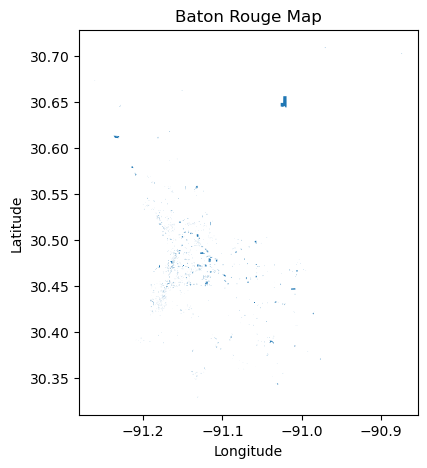

In [25]:
# Plot the shapefile data using geopandas's built-in plot function
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
geodata.plot(ax=ax)

# Add title and axis labels
ax.set_title('Baton Rouge Map')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Show the plot
plt.show()

In [26]:
# ensure that 'Parcel ID' column in both dataframes are the same data type
geodata['Parcel ID'] = geodata['Parcel ID'].astype(str)
final_df['Parcel ID'] = final_df['Parcel ID'].astype(str)

# Merge final_df with geodata based on 'Parcel ID'
merged_df = final_df[['Parcel ID', 'Address','Current Use','USPS Vacancy','Adjudicated Property']].merge(geodata[['Parcel ID', 'geometry','Census Bl','Neighborh','Council D','Is Vacant']], on='Parcel ID', how='left')
merged_df

,Parcel ID,Address,Current Use,USPS Vacancy,Adjudicated Property,geometry,Census Bl,Neighborh,Council D,Is Vacant
0,43257,"700 SCENIC HWY, Baton Rouge, LA",VACANT,Not Vacant,Unknown,"POLYGON ((-91.16724 30.45438, -91.16721 30.454...",County 033 Tract 005300 Block 3043,DOWNTOWN EAST,10 - Carolyn Coleman,No
1,1248057,"12174 LEONIDAS ST, Baton Rouge, LA",VACANT,Unavailable,Unknown,"POLYGON ((-91.16607 30.55620, -91.16610 30.556...",County 033 Tract 004201 Block 3006,BAKER,02 - Chauna Banks,No
2,775169,"974 W ROOSEVELT ST, Baton Rouge, LA",VACANT,Unavailable,Unknown,"POLYGON ((-91.18895 30.42161, -91.18900 30.421...",County 033 Tract 002400 Block 1009,OLD SOUTH BATON ROUGE,10 - Carolyn Coleman,Yes
3,1757458,"2861 BRIGHTSIDE DR, Baton Rouge, LA",VACANT,Unavailable,Unknown,"POLYGON ((-91.19210 30.38963, -91.19199 30.389...",County 033 Tract 004014 Block 2009,SOUTH CAMPUS,03 - Rowdy Gaudet,No
4,406937,"1300 N 38TH ST, Baton Rouge, LA",VACANT,Unavailable,Unknown,"POLYGON ((-91.15202 30.46030, -91.15201 30.460...",County 033 Tract 001000 Block 2020,EDEN PARK,07 - LaMont Cole,No
...,...,...,...,...,...,...,...,...,...,...
2333,1123890,"8675 SCENIC HWY, Baton Rouge, LA",VACANT,Unavailable,Unknown,"POLYGON ((-91.18242 30.52593, -91.18283 30.525...",County 033 Tract 003101 Block 4030,SCOTLANDVILLE,02 - Chauna Banks,No
2334,782041,"1711 NICHOLSON DR, Baton Rouge, LA",VACANT,Unavailable,Unknown,"POLYGON ((-91.18640 30.43154, -91.18749 30.431...",County 033 Tract 005200 Block 2121,OLD SOUTH BATON ROUGE,10 - Carolyn Coleman,No
2335,54275,"Address Unknown, Baton Rouge, LA",VACANT,Unavailable,Unknown,"POLYGON ((-91.17040 30.44884, -91.17056 30.448...",County 033 Tract 005300 Block 3080,DOWNTOWN EAST,10 - Carolyn Coleman,No
2336,703796,"1775 EDDIE ROBINSON SR DR, Baton Rouge, LA",VACANT,Unavailable,Yes,"POLYGON ((-91.17194 30.43160, -91.17207 30.431...",County 033 Tract 002200 Block 2062,OLD SOUTH BATON ROUGE,10 - Carolyn Coleman,No


In [27]:
# Extract the columns that have 'Fire Incidents' in their names
fire_cols = [col for col in df_fire.columns if 'Fire Incidents' in col]
merged_df = merged_df.merge(df_fire[['Parcel ID'] + fire_cols], on='Parcel ID', how='left')

police_cols = [col for col in df_police.columns if 'Police Incidents' in col]
merged_df = merged_df.merge(df_police[['Parcel ID'] + police_cols], on='Parcel ID', how='left')

service_cols = [col for col in df_service.columns if 'Service' in col]
merged_df = merged_df.merge(df_service[['Parcel ID'] + service_cols], on='Parcel ID', how='left')

merged_df

,Parcel ID,Address,Current Use,USPS Vacancy,Adjudicated Property,geometry,Census Bl,Neighborh,Council D,Is Vacant,...,Calls for Service - Count - Between 01-01-2019 and 12-31-2019,Blight Service Calls - Count - Between 01-01-2020 and 12-31-2020,Calls for Service - Count - Between 01-01-2020 and 12-31-2020,Blight Service Calls - Count - Between 01-01-2021 and 12-31-2021,Calls for Service - Count - Between 01-01-2021 and 12-31-2021,Blight Service Calls - Count - Between 01-01-2022 and 12-31-2022,Calls for Service - Count - Between 01-01-2022 and 12-31-2022,Blight Service Calls - Count - Between 01-01-2023 and 12-31-2023,Calls for Service - Count - Between 01-01-2023 and 12-31-2023,Total Service Calls
0,43257,"700 SCENIC HWY, Baton Rouge, LA",VACANT,Not Vacant,Unknown,"POLYGON ((-91.16724 30.45438, -91.16721 30.454...",County 033 Tract 005300 Block 3043,DOWNTOWN EAST,10 - Carolyn Coleman,No,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0
1,1248057,"12174 LEONIDAS ST, Baton Rouge, LA",VACANT,Unavailable,Unknown,"POLYGON ((-91.16607 30.55620, -91.16610 30.556...",County 033 Tract 004201 Block 3006,BAKER,02 - Chauna Banks,No,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,775169,"974 W ROOSEVELT ST, Baton Rouge, LA",VACANT,Unavailable,Unknown,"POLYGON ((-91.18895 30.42161, -91.18900 30.421...",County 033 Tract 002400 Block 1009,OLD SOUTH BATON ROUGE,10 - Carolyn Coleman,Yes,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,3.0
3,1757458,"2861 BRIGHTSIDE DR, Baton Rouge, LA",VACANT,Unavailable,Unknown,"POLYGON ((-91.19210 30.38963, -91.19199 30.389...",County 033 Tract 004014 Block 2009,SOUTH CAMPUS,03 - Rowdy Gaudet,No,...,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,9.0
4,406937,"1300 N 38TH ST, Baton Rouge, LA",VACANT,Unavailable,Unknown,"POLYGON ((-91.15202 30.46030, -91.15201 30.460...",County 033 Tract 001000 Block 2020,EDEN PARK,07 - LaMont Cole,No,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2333,1123890,"8675 SCENIC HWY, Baton Rouge, LA",VACANT,Unavailable,Unknown,"POLYGON ((-91.18242 30.52593, -91.18283 30.525...",County 033 Tract 003101 Block 4030,SCOTLANDVILLE,02 - Chauna Banks,No,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2334,782041,"1711 NICHOLSON DR, Baton Rouge, LA",VACANT,Unavailable,Unknown,"POLYGON ((-91.18640 30.43154, -91.18749 30.431...",County 033 Tract 005200 Block 2121,OLD SOUTH BATON ROUGE,10 - Carolyn Coleman,No,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2335,54275,"Address Unknown, Baton Rouge, LA",VACANT,Unavailable,Unknown,"POLYGON ((-91.17040 30.44884, -91.17056 30.448...",County 033 Tract 005300 Block 3080,DOWNTOWN EAST,10 - Carolyn Coleman,No,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2336,703796,"1775 EDDIE ROBINSON SR DR, Baton Rouge, LA",VACANT,Unavailable,Yes,"POLYGON ((-91.17194 30.43160, -91.17207 30.431...",County 033 Tract 002200 Block 2062,OLD SOUTH BATON ROUGE,10 - Carolyn Coleman,No,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
fire_cols1 = [col for col in df_firecost_Conservative.columns if 'Fire' in col]
merged_df = merged_df.merge(df_firecost_Conservative[['Parcel ID'] + fire_cols1], on='Parcel ID', how='left')

fire_cols2 = [col for col in df_firecost_Loaded.columns if 'Fire' in col]
merged_df = merged_df.merge(df_firecost_Loaded[['Parcel ID'] + fire_cols2], on='Parcel ID', how='left')

police_cols1 = [col for col in df_policecost_Conservative.columns if 'Police' in col]
merged_df = merged_df.merge(df_policecost_Conservative[['Parcel ID'] + police_cols1], on='Parcel ID', how='left')

police_cols2 = [col for col in df_policecost_Loaded.columns if 'Police' in col]
merged_df = merged_df.merge(df_policecost_Loaded[['Parcel ID'] + police_cols2], on='Parcel ID', how='left')

service_cols1 = [col for col in df_servicecost_Conservative.columns if 'Service' in col]
merged_df = merged_df.merge(df_servicecost_Conservative[['Parcel ID'] + service_cols1], on='Parcel ID', how='left')

service_cols2 = [col for col in df_servicecost_Loaded.columns if 'Service' in col]
merged_df = merged_df.merge(df_servicecost_Loaded[['Parcel ID'] + service_cols2], on='Parcel ID', how='left')

merged_df['Parcel ID'] = merged_df['Parcel ID'].apply(str)
merged_df['Parcel ID'] = merged_df['Parcel ID'].str.zfill(10)

incident_service_columns = [col for col in merged_df.columns if 'Incidents' in col or 'Service' in col or 'Costs' in col]
merged_df.loc['Total', incident_service_columns] = merged_df[incident_service_columns].sum()

merged_df

,Parcel ID,Address,Current Use,USPS Vacancy,Adjudicated Property,geometry,Census Bl,Neighborh,Council D,Is Vacant,...,Calls for Service - Loaded cost - Between 01-01-2019 and 12-31-2019,Blight Service Calls - Loaded cost - Between 01-01-2020 and 12-31-2020,Calls for Service - Loaded cost - Between 01-01-2020 and 12-31-2020,Blight Service Calls - Loaded cost - Between 01-01-2021 and 12-31-2021,Calls for Service - Loaded cost - Between 01-01-2021 and 12-31-2021,Blight Service Calls - Loaded cost - Between 01-01-2022 and 12-31-2022,Calls for Service - Loaded cost - Between 01-01-2022 and 12-31-2022,Blight Service Calls - Loaded cost - Between 01-01-2023 and 12-31-2023,Calls for Service - Loaded cost - Between 01-01-2023 and 12-31-2023,Total Loaded Service Costs
0,0000043257,"700 SCENIC HWY, Baton Rouge, LA",VACANT,Not Vacant,Unknown,"POLYGON ((-91.16724 30.45438, -91.16721 30.454...",County 033 Tract 005300 Block 3043,DOWNTOWN EAST,10 - Carolyn Coleman,No,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,375.544672
1,0001248057,"12174 LEONIDAS ST, Baton Rouge, LA",VACANT,Unavailable,Unknown,"POLYGON ((-91.16607 30.55620, -91.16610 30.556...",County 033 Tract 004201 Block 3006,BAKER,02 - Chauna Banks,No,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
2,0000775169,"974 W ROOSEVELT ST, Baton Rouge, LA",VACANT,Unavailable,Unknown,"POLYGON ((-91.18895 30.42161, -91.18900 30.421...",County 033 Tract 002400 Block 1009,OLD SOUTH BATON ROUGE,10 - Carolyn Coleman,Yes,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,75.184991,0.000000,78.711167,213.682937
3,0001757458,"2861 BRIGHTSIDE DR, Baton Rouge, LA",VACANT,Unavailable,Unknown,"POLYGON ((-91.19210 30.38963, -91.19199 30.389...",County 033 Tract 004014 Block 2009,SOUTH CAMPUS,03 - Rowdy Gaudet,No,...,65.526286,0.000000,0.000000,0.000000,0.000000,0.00000,150.369983,0.000000,0.000000,566.707406
4,0000406937,"1300 N 38TH ST, Baton Rouge, LA",VACANT,Unavailable,Unknown,"POLYGON ((-91.15202 30.46030, -91.15201 30.460...",County 033 Tract 001000 Block 2020,EDEN PARK,07 - LaMont Cole,No,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2334,0000782041,"1711 NICHOLSON DR, Baton Rouge, LA",VACANT,Unavailable,Unknown,"POLYGON ((-91.18640 30.43154, -91.18749 30.431...",County 033 Tract 005200 Block 2121,OLD SOUTH BATON ROUGE,10 - Carolyn Coleman,No,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
2335,0000054275,"Address Unknown, Baton Rouge, LA",VACANT,Unavailable,Unknown,"POLYGON ((-91.17040 30.44884, -91.17056 30.448...",County 033 Tract 005300 Block 3080,DOWNTOWN EAST,10 - Carolyn Coleman,No,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
2336,0000703796,"1775 EDDIE ROBINSON SR DR, Baton Rouge, LA",VACANT,Unavailable,Yes,"POLYGON ((-91.17194 30.43160, -91.17207 30.431...",County 033 Tract 002200 Block 2062,OLD SOUTH BATON ROUGE,10 - Carolyn Coleman,No,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
2337,0001190938,"9838 AVE, Baton Rouge, LA",VACANT,Unavailable,Unknown,"POLYGON ((-91.19835 30.53373, -91.19834 30.533...",County 033 Tract 003000 Block 3015,THE AVENUES/SOUTHERN UNIV,10 - Carolyn Coleman,No,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000


In [29]:
import re
def rename_year(col):
    # Find the years in the column name
    years = re.findall(r'\d{4}', col)
    if years:
        # Replace with the last found year
        return col.replace(f"Between 01-01-{years[0]} and 12-31-{years[-1]}", years[-1])
    else:
        # Return the original column name if no years found
        return col

merged_df.columns = merged_df.columns.map(rename_year)
merged_df

,Parcel ID,Address,Current Use,USPS Vacancy,Adjudicated Property,geometry,Census Bl,Neighborh,Council D,Is Vacant,...,Calls for Service - Loaded cost - 2019,Blight Service Calls - Loaded cost - 2020,Calls for Service - Loaded cost - 2020,Blight Service Calls - Loaded cost - 2021,Calls for Service - Loaded cost - 2021,Blight Service Calls - Loaded cost - 2022,Calls for Service - Loaded cost - 2022,Blight Service Calls - Loaded cost - 2023,Calls for Service - Loaded cost - 2023,Total Loaded Service Costs
0,0000043257,"700 SCENIC HWY, Baton Rouge, LA",VACANT,Not Vacant,Unknown,"POLYGON ((-91.16724 30.45438, -91.16721 30.454...",County 033 Tract 005300 Block 3043,DOWNTOWN EAST,10 - Carolyn Coleman,No,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,375.544672
1,0001248057,"12174 LEONIDAS ST, Baton Rouge, LA",VACANT,Unavailable,Unknown,"POLYGON ((-91.16607 30.55620, -91.16610 30.556...",County 033 Tract 004201 Block 3006,BAKER,02 - Chauna Banks,No,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
2,0000775169,"974 W ROOSEVELT ST, Baton Rouge, LA",VACANT,Unavailable,Unknown,"POLYGON ((-91.18895 30.42161, -91.18900 30.421...",County 033 Tract 002400 Block 1009,OLD SOUTH BATON ROUGE,10 - Carolyn Coleman,Yes,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,75.184991,0.000000,78.711167,213.682937
3,0001757458,"2861 BRIGHTSIDE DR, Baton Rouge, LA",VACANT,Unavailable,Unknown,"POLYGON ((-91.19210 30.38963, -91.19199 30.389...",County 033 Tract 004014 Block 2009,SOUTH CAMPUS,03 - Rowdy Gaudet,No,...,65.526286,0.000000,0.000000,0.000000,0.000000,0.00000,150.369983,0.000000,0.000000,566.707406
4,0000406937,"1300 N 38TH ST, Baton Rouge, LA",VACANT,Unavailable,Unknown,"POLYGON ((-91.15202 30.46030, -91.15201 30.460...",County 033 Tract 001000 Block 2020,EDEN PARK,07 - LaMont Cole,No,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2334,0000782041,"1711 NICHOLSON DR, Baton Rouge, LA",VACANT,Unavailable,Unknown,"POLYGON ((-91.18640 30.43154, -91.18749 30.431...",County 033 Tract 005200 Block 2121,OLD SOUTH BATON ROUGE,10 - Carolyn Coleman,No,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
2335,0000054275,"Address Unknown, Baton Rouge, LA",VACANT,Unavailable,Unknown,"POLYGON ((-91.17040 30.44884, -91.17056 30.448...",County 033 Tract 005300 Block 3080,DOWNTOWN EAST,10 - Carolyn Coleman,No,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
2336,0000703796,"1775 EDDIE ROBINSON SR DR, Baton Rouge, LA",VACANT,Unavailable,Yes,"POLYGON ((-91.17194 30.43160, -91.17207 30.431...",County 033 Tract 002200 Block 2062,OLD SOUTH BATON ROUGE,10 - Carolyn Coleman,No,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
2337,0001190938,"9838 AVE, Baton Rouge, LA",VACANT,Unavailable,Unknown,"POLYGON ((-91.19835 30.53373, -91.19834 30.533...",County 033 Tract 003000 Block 3015,THE AVENUES/SOUTHERN UNIV,10 - Carolyn Coleman,No,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000


In [30]:
# Define the column list for conservative and loaded costs
conservative_columns = [col for col in merged_df.columns if 'Total Conservative' in col]
loaded_columns = [col for col in merged_df.columns if 'Total Loaded' in col]
    
# Create the new columns
merged_df['Total Conservative Costs'] = merged_df[conservative_columns].sum(axis=1)
merged_df['Total Loaded Costs'] = merged_df[loaded_columns].sum(axis=1)
merged_df

C:\Users\August Liu\AppData\Local\Temp\ipykernel_19580\1469258256.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  merged_df['Total Conservative Costs'] = merged_df[conservative_columns].sum(axis=1)
C:\Users\August Liu\AppData\Local\Temp\ipykernel_19580\1469258256.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  merged_df['Total Loaded Costs'] = merged_df[loaded_columns].sum(axis=1)


,Parcel ID,Address,Current Use,USPS Vacancy,Adjudicated Property,geometry,Census Bl,Neighborh,Council D,Is Vacant,...,Calls for Service - Loaded cost - 2020,Blight Service Calls - Loaded cost - 2021,Calls for Service - Loaded cost - 2021,Blight Service Calls - Loaded cost - 2022,Calls for Service - Loaded cost - 2022,Blight Service Calls - Loaded cost - 2023,Calls for Service - Loaded cost - 2023,Total Loaded Service Costs,Total Conservative Costs,Total Loaded Costs
0,0000043257,"700 SCENIC HWY, Baton Rouge, LA",VACANT,Not Vacant,Unknown,"POLYGON ((-91.16724 30.45438, -91.16721 30.454...",County 033 Tract 005300 Block 3043,DOWNTOWN EAST,10 - Carolyn Coleman,No,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,375.544672,574.318099,615.778535
1,0001248057,"12174 LEONIDAS ST, Baton Rouge, LA",VACANT,Unavailable,Unknown,"POLYGON ((-91.16607 30.55620, -91.16610 30.556...",County 033 Tract 004201 Block 3006,BAKER,02 - Chauna Banks,No,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0000775169,"974 W ROOSEVELT ST, Baton Rouge, LA",VACANT,Unavailable,Unknown,"POLYGON ((-91.18895 30.42161, -91.18900 30.421...",County 033 Tract 002400 Block 1009,OLD SOUTH BATON ROUGE,10 - Carolyn Coleman,Yes,...,0.000000,0.000000,0.000000,0.00000,75.184991,0.000000,78.711167,213.682937,298.100824,327.276593
3,0001757458,"2861 BRIGHTSIDE DR, Baton Rouge, LA",VACANT,Unavailable,Unknown,"POLYGON ((-91.19210 30.38963, -91.19199 30.389...",County 033 Tract 004014 Block 2009,SOUTH CAMPUS,03 - Rowdy Gaudet,No,...,0.000000,0.000000,0.000000,0.00000,150.369983,0.000000,0.000000,566.707406,548.780404,566.707406
4,0000406937,"1300 N 38TH ST, Baton Rouge, LA",VACANT,Unavailable,Unknown,"POLYGON ((-91.15202 30.46030, -91.15201 30.460...",County 033 Tract 001000 Block 2020,EDEN PARK,07 - LaMont Cole,No,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2334,0000782041,"1711 NICHOLSON DR, Baton Rouge, LA",VACANT,Unavailable,Unknown,"POLYGON ((-91.18640 30.43154, -91.18749 30.431...",County 033 Tract 005200 Block 2121,OLD SOUTH BATON ROUGE,10 - Carolyn Coleman,No,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2335,0000054275,"Address Unknown, Baton Rouge, LA",VACANT,Unavailable,Unknown,"POLYGON ((-91.17040 30.44884, -91.17056 30.448...",County 033 Tract 005300 Block 3080,DOWNTOWN EAST,10 - Carolyn Coleman,No,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2336,0000703796,"1775 EDDIE ROBINSON SR DR, Baton Rouge, LA",VACANT,Unavailable,Yes,"POLYGON ((-91.17194 30.43160, -91.17207 30.431...",County 033 Tract 002200 Block 2062,OLD SOUTH BATON ROUGE,10 - Carolyn Coleman,No,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2337,0001190938,"9838 AVE, Baton Rouge, LA",VACANT,Unavailable,Unknown,"POLYGON ((-91.19835 30.53373, -91.19834 30.533...",County 033 Tract 003000 Block 3015,THE AVENUES/SOUTHERN UNIV,10 - Carolyn Coleman,No,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [31]:
# Reset the index to make sure 'Total' is not used as an index
merged_df.reset_index(inplace=True)

# Replace the last row's "Parcel ID" with "Total"
merged_df.loc[merged_df.index[-1], 'Parcel ID'] = 'Total'
merged_df

C:\Users\August Liu\AppData\Local\Temp\ipykernel_19580\3195996938.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  merged_df.reset_index(inplace=True)


,index,Parcel ID,Address,Current Use,USPS Vacancy,Adjudicated Property,geometry,Census Bl,Neighborh,Council D,...,Calls for Service - Loaded cost - 2020,Blight Service Calls - Loaded cost - 2021,Calls for Service - Loaded cost - 2021,Blight Service Calls - Loaded cost - 2022,Calls for Service - Loaded cost - 2022,Blight Service Calls - Loaded cost - 2023,Calls for Service - Loaded cost - 2023,Total Loaded Service Costs,Total Conservative Costs,Total Loaded Costs
0,0,0000043257,"700 SCENIC HWY, Baton Rouge, LA",VACANT,Not Vacant,Unknown,"POLYGON ((-91.16724 30.45438, -91.16721 30.454...",County 033 Tract 005300 Block 3043,DOWNTOWN EAST,10 - Carolyn Coleman,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,375.544672,574.318099,615.778535
1,1,0001248057,"12174 LEONIDAS ST, Baton Rouge, LA",VACANT,Unavailable,Unknown,"POLYGON ((-91.16607 30.55620, -91.16610 30.556...",County 033 Tract 004201 Block 3006,BAKER,02 - Chauna Banks,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,2,0000775169,"974 W ROOSEVELT ST, Baton Rouge, LA",VACANT,Unavailable,Unknown,"POLYGON ((-91.18895 30.42161, -91.18900 30.421...",County 033 Tract 002400 Block 1009,OLD SOUTH BATON ROUGE,10 - Carolyn Coleman,...,0.000000,0.000000,0.000000,0.00000,75.184991,0.000000,78.711167,213.682937,298.100824,327.276593
3,3,0001757458,"2861 BRIGHTSIDE DR, Baton Rouge, LA",VACANT,Unavailable,Unknown,"POLYGON ((-91.19210 30.38963, -91.19199 30.389...",County 033 Tract 004014 Block 2009,SOUTH CAMPUS,03 - Rowdy Gaudet,...,0.000000,0.000000,0.000000,0.00000,150.369983,0.000000,0.000000,566.707406,548.780404,566.707406
4,4,0000406937,"1300 N 38TH ST, Baton Rouge, LA",VACANT,Unavailable,Unknown,"POLYGON ((-91.15202 30.46030, -91.15201 30.460...",County 033 Tract 001000 Block 2020,EDEN PARK,07 - LaMont Cole,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2334,2334,0000782041,"1711 NICHOLSON DR, Baton Rouge, LA",VACANT,Unavailable,Unknown,"POLYGON ((-91.18640 30.43154, -91.18749 30.431...",County 033 Tract 005200 Block 2121,OLD SOUTH BATON ROUGE,10 - Carolyn Coleman,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2335,2335,0000054275,"Address Unknown, Baton Rouge, LA",VACANT,Unavailable,Unknown,"POLYGON ((-91.17040 30.44884, -91.17056 30.448...",County 033 Tract 005300 Block 3080,DOWNTOWN EAST,10 - Carolyn Coleman,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2336,2336,0000703796,"1775 EDDIE ROBINSON SR DR, Baton Rouge, LA",VACANT,Unavailable,Yes,"POLYGON ((-91.17194 30.43160, -91.17207 30.431...",County 033 Tract 002200 Block 2062,OLD SOUTH BATON ROUGE,10 - Carolyn Coleman,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2337,2337,0001190938,"9838 AVE, Baton Rouge, LA",VACANT,Unavailable,Unknown,"POLYGON ((-91.19835 30.53373, -91.19834 30.533...",County 033 Tract 003000 Block 3015,THE AVENUES/SOUTHERN UNIV,10 - Carolyn Coleman,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [32]:
# Specify the column(s) with leading zeros as string type
merged_df['Parcel ID'] = merged_df['Parcel ID'].astype(str)
merged_df.to_csv('call&cost_count_with_Geo.csv', index=False)
# Save the DataFrame as XLSX
merged_df.to_excel('call&cost_count_with_Geo.xlsx', index=False)

In [33]:
# Load the csv
tax = pd.read_csv('tax.csv')
tax

,Parcel ID,sum,sum.1,sum.2,sum.3,sum.4,sum.5,sum.6,sum.7,sum.8,...,sum.17,sum.18,sum.19,sum.20,sum.21,sum.22,sum.23,sum.24,sum.25,sum.26
0,NaN,AllInTax,AllInTax,AllInTax,AllInTax,AllInTax,AllInTax,AllInTax,AllInTax,AllInTax,...,ConservativeTax,Total Assessed Value,Total Assessed Value,Total Assessed Value,Total Assessed Value,Total Assessed Value,Total Assessed Value,Total Assessed Value,Total Assessed Value,Total Assessed Value
1,NaN,2015,2016,2017,2018,2019,2020,2021,2022,Total,...,Total,2015,2016,2017,2018,2019,2020,2021,2022,Total
2,0000000647,59.84165,59.84165,59.84165,59.84165,59.84165,59.84165,59.84165,59.84165,478.7332,...,232.0252,550,550,550,550,550,550,550,550,4400.0
3,0000003158,54.4015,54.4015,54.4015,54.4015,54.4015,54.4015,54.4015,54.4015,435.212,...,210.93200000000002,500,500,500,500,500,500,500,500,4000.0
4,0000003247,60.92968,60.92968,30.46484,30.46484,30.46484,30.46484,30.46484,30.46484,304.6484,...,147.6524,560,560,280,280,280,280,280,280,2800.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
601,0003261956,23.93666,23.93666,23.93666,23.93666,23.93666,23.93666,23.93666,23.93666,191.49328,...,92.81008,220,220,220,220,220,220,220,220,1760.0
602,0003262073,42.43317,42.43317,42.43317,42.43317,42.43317,42.43317,42.43317,42.43317,339.46536,...,164.52696,390,390,390,390,390,390,390,390,3120.0
603,0003588408,95.74664,95.74664,95.74664,95.74664,95.74664,95.74664,95.74664,95.74664,765.97312,...,371.24032,880,880,880,880,880,880,880,880,7040.0
604,0003588939,108.803,108.803,108.803,108.803,108.803,108.803,108.803,108.803,870.424,...,421.86400000000003,1000,1000,1000,1000,1000,1000,1000,1000,8000.0


In [34]:
# Create new column names
new_columns = ['Parcel ID'] + [f"{tax.iloc[0, i]} {tax.iloc[1, i]}" for i in range(1, tax.shape[1])]

# Assign the new column names to the DataFrame
tax.columns = new_columns

# Remove the first two rows
tax = tax.iloc[2:].reset_index(drop=True)

# Convert 'Parcel ID' to str
tax['Parcel ID'] = tax['Parcel ID'].astype(str)
tax

,Parcel ID,AllInTax 2015,AllInTax 2016,AllInTax 2017,AllInTax 2018,AllInTax 2019,AllInTax 2020,AllInTax 2021,AllInTax 2022,AllInTax Total,...,ConservativeTax Total,Total Assessed Value 2015,Total Assessed Value 2016,Total Assessed Value 2017,Total Assessed Value 2018,Total Assessed Value 2019,Total Assessed Value 2020,Total Assessed Value 2021,Total Assessed Value 2022,Total Assessed Value Total
0,0000000647,59.84165,59.84165,59.84165,59.84165,59.84165,59.84165,59.84165,59.84165,478.7332,...,232.0252,550,550,550,550,550,550,550,550,4400.0
1,0000003158,54.4015,54.4015,54.4015,54.4015,54.4015,54.4015,54.4015,54.4015,435.212,...,210.93200000000002,500,500,500,500,500,500,500,500,4000.0
2,0000003247,60.92968,60.92968,30.46484,30.46484,30.46484,30.46484,30.46484,30.46484,304.6484,...,147.6524,560,560,280,280,280,280,280,280,2800.0
3,0000003298,35.90499,35.90499,35.90499,35.90499,35.90499,35.90499,35.90499,35.90499,287.23992,...,139.21512,330,330,330,330,330,330,330,330,2640.0
4,0000003670,108.803,108.803,108.803,108.803,108.803,108.803,108.803,108.803,870.424,...,421.86400000000003,1000,1000,1000,1000,1000,1000,1000,1000,8000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599,0003261956,23.93666,23.93666,23.93666,23.93666,23.93666,23.93666,23.93666,23.93666,191.49328,...,92.81008,220,220,220,220,220,220,220,220,1760.0
600,0003262073,42.43317,42.43317,42.43317,42.43317,42.43317,42.43317,42.43317,42.43317,339.46536,...,164.52696,390,390,390,390,390,390,390,390,3120.0
601,0003588408,95.74664,95.74664,95.74664,95.74664,95.74664,95.74664,95.74664,95.74664,765.97312,...,371.24032,880,880,880,880,880,880,880,880,7040.0
602,0003588939,108.803,108.803,108.803,108.803,108.803,108.803,108.803,108.803,870.424,...,421.86400000000003,1000,1000,1000,1000,1000,1000,1000,1000,8000.0


In [35]:
total_df = pd.merge(merged_df, tax, on='Parcel ID', how='left')
total_df

,index,Parcel ID,Address,Current Use,USPS Vacancy,Adjudicated Property,geometry,Census Bl,Neighborh,Council D,...,ConservativeTax Total,Total Assessed Value 2015,Total Assessed Value 2016,Total Assessed Value 2017,Total Assessed Value 2018,Total Assessed Value 2019,Total Assessed Value 2020,Total Assessed Value 2021,Total Assessed Value 2022,Total Assessed Value Total
0,0,0000043257,"700 SCENIC HWY, Baton Rouge, LA",VACANT,Not Vacant,Unknown,"POLYGON ((-91.16724 30.45438, -91.16721 30.454...",County 033 Tract 005300 Block 3043,DOWNTOWN EAST,10 - Carolyn Coleman,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,0001248057,"12174 LEONIDAS ST, Baton Rouge, LA",VACANT,Unavailable,Unknown,"POLYGON ((-91.16607 30.55620, -91.16610 30.556...",County 033 Tract 004201 Block 3006,BAKER,02 - Chauna Banks,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,0000775169,"974 W ROOSEVELT ST, Baton Rouge, LA",VACANT,Unavailable,Unknown,"POLYGON ((-91.18895 30.42161, -91.18900 30.421...",County 033 Tract 002400 Block 1009,OLD SOUTH BATON ROUGE,10 - Carolyn Coleman,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,0001757458,"2861 BRIGHTSIDE DR, Baton Rouge, LA",VACANT,Unavailable,Unknown,"POLYGON ((-91.19210 30.38963, -91.19199 30.389...",County 033 Tract 004014 Block 2009,SOUTH CAMPUS,03 - Rowdy Gaudet,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,0000406937,"1300 N 38TH ST, Baton Rouge, LA",VACANT,Unavailable,Unknown,"POLYGON ((-91.15202 30.46030, -91.15201 30.460...",County 033 Tract 001000 Block 2020,EDEN PARK,07 - LaMont Cole,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2334,2334,0000782041,"1711 NICHOLSON DR, Baton Rouge, LA",VACANT,Unavailable,Unknown,"POLYGON ((-91.18640 30.43154, -91.18749 30.431...",County 033 Tract 005200 Block 2121,OLD SOUTH BATON ROUGE,10 - Carolyn Coleman,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2335,2335,0000054275,"Address Unknown, Baton Rouge, LA",VACANT,Unavailable,Unknown,"POLYGON ((-91.17040 30.44884, -91.17056 30.448...",County 033 Tract 005300 Block 3080,DOWNTOWN EAST,10 - Carolyn Coleman,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2336,2336,0000703796,"1775 EDDIE ROBINSON SR DR, Baton Rouge, LA",VACANT,Unavailable,Yes,"POLYGON ((-91.17194 30.43160, -91.17207 30.431...",County 033 Tract 002200 Block 2062,OLD SOUTH BATON ROUGE,10 - Carolyn Coleman,...,92.81008,220,220,220,220,220,220,220,220,1760.0
2337,2337,0001190938,"9838 AVE, Baton Rouge, LA",VACANT,Unavailable,Unknown,"POLYGON ((-91.19835 30.53373, -91.19834 30.533...",County 033 Tract 003000 Block 3015,THE AVENUES/SOUTHERN UNIV,10 - Carolyn Coleman,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
# Delete duplicate rows based on all columns
total_df = total_df.drop_duplicates()
total_df

,index,Parcel ID,Address,Current Use,USPS Vacancy,Adjudicated Property,geometry,Census Bl,Neighborh,Council D,...,ConservativeTax Total,Total Assessed Value 2015,Total Assessed Value 2016,Total Assessed Value 2017,Total Assessed Value 2018,Total Assessed Value 2019,Total Assessed Value 2020,Total Assessed Value 2021,Total Assessed Value 2022,Total Assessed Value Total
0,0,0000043257,"700 SCENIC HWY, Baton Rouge, LA",VACANT,Not Vacant,Unknown,"POLYGON ((-91.16724 30.45438, -91.16721 30.454...",County 033 Tract 005300 Block 3043,DOWNTOWN EAST,10 - Carolyn Coleman,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,0001248057,"12174 LEONIDAS ST, Baton Rouge, LA",VACANT,Unavailable,Unknown,"POLYGON ((-91.16607 30.55620, -91.16610 30.556...",County 033 Tract 004201 Block 3006,BAKER,02 - Chauna Banks,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,0000775169,"974 W ROOSEVELT ST, Baton Rouge, LA",VACANT,Unavailable,Unknown,"POLYGON ((-91.18895 30.42161, -91.18900 30.421...",County 033 Tract 002400 Block 1009,OLD SOUTH BATON ROUGE,10 - Carolyn Coleman,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,0001757458,"2861 BRIGHTSIDE DR, Baton Rouge, LA",VACANT,Unavailable,Unknown,"POLYGON ((-91.19210 30.38963, -91.19199 30.389...",County 033 Tract 004014 Block 2009,SOUTH CAMPUS,03 - Rowdy Gaudet,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,0000406937,"1300 N 38TH ST, Baton Rouge, LA",VACANT,Unavailable,Unknown,"POLYGON ((-91.15202 30.46030, -91.15201 30.460...",County 033 Tract 001000 Block 2020,EDEN PARK,07 - LaMont Cole,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2334,2334,0000782041,"1711 NICHOLSON DR, Baton Rouge, LA",VACANT,Unavailable,Unknown,"POLYGON ((-91.18640 30.43154, -91.18749 30.431...",County 033 Tract 005200 Block 2121,OLD SOUTH BATON ROUGE,10 - Carolyn Coleman,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2335,2335,0000054275,"Address Unknown, Baton Rouge, LA",VACANT,Unavailable,Unknown,"POLYGON ((-91.17040 30.44884, -91.17056 30.448...",County 033 Tract 005300 Block 3080,DOWNTOWN EAST,10 - Carolyn Coleman,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2336,2336,0000703796,"1775 EDDIE ROBINSON SR DR, Baton Rouge, LA",VACANT,Unavailable,Yes,"POLYGON ((-91.17194 30.43160, -91.17207 30.431...",County 033 Tract 002200 Block 2062,OLD SOUTH BATON ROUGE,10 - Carolyn Coleman,...,92.81008,220,220,220,220,220,220,220,220,1760.0
2337,2337,0001190938,"9838 AVE, Baton Rouge, LA",VACANT,Unavailable,Unknown,"POLYGON ((-91.19835 30.53373, -91.19834 30.533...",County 033 Tract 003000 Block 3015,THE AVENUES/SOUTHERN UNIV,10 - Carolyn Coleman,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
# Specify the column(s) with leading zeros as string type
total_df['Parcel ID'] = total_df['Parcel ID'].astype(str)
total_df.to_csv('total_Geo.csv', index=False)
# Save the DataFrame as XLSX
total_df.to_excel('total_Geo.xlsx', index=False)

In [51]:
# Create a GeoDataFrame from the DataFrame with the existing Polygon geometries
gdf_total = gpd.GeoDataFrame(total_df, geometry='geometry')

# Specify the output shapefile path and filename
output_shapefile_total = 'total_Geo.shp'

# Save the GeoDataFrame as a shapefile
gdf_total.to_file(output_shapefile_total, driver='ESRI Shapefile')

C:\Users\August Liu\AppData\Local\Temp\ipykernel_19580\2612997557.py:8: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf_total.to_file(output_shapefile_total, driver='ESRI Shapefile')


In [37]:
# Create a GeoDataFrame from the DataFrame with the existing Polygon geometries
gdf = gpd.GeoDataFrame(merged_df, geometry='geometry')

# Specify the output shapefile path and filename
output_shapefile = 'call&cost_count_with_Geo.shp'

# Save the GeoDataFrame as a shapefile
gdf.to_file(output_shapefile, driver='ESRI Shapefile')

C:\Users\August Liu\AppData\Local\Temp\ipykernel_19580\1722783463.py:8: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf.to_file(output_shapefile, driver='ESRI Shapefile')


In [52]:
# Load the shapefile into a GeoDataFrame
trygeo = gpd.read_file('total_Geo.shp')

# Optionally, print the dataframe to see the data
trygeo

,index,Parcel ID,Address,Current Us,USPS Vacan,Adjudicate,Census Bl,Neighborh,Council D,Is Vacant,...,Total Asse,Total As_1,Total As_2,Total As_3,Total As_4,Total As_5,Total As_6,Total As_7,Total As_8,geometry
0,0,0000043257,"700 SCENIC HWY, Baton Rouge, LA",VACANT,Not Vacant,Unknown,County 033 Tract 005300 Block 3043,DOWNTOWN EAST,10 - Carolyn Coleman,No,...,None,None,None,None,None,None,None,None,None,"POLYGON ((-91.16724 30.45438, -91.16721 30.454..."
1,1,0001248057,"12174 LEONIDAS ST, Baton Rouge, LA",VACANT,Unavailable,Unknown,County 033 Tract 004201 Block 3006,BAKER,02 - Chauna Banks,No,...,None,None,None,None,None,None,None,None,None,"POLYGON ((-91.16607 30.55620, -91.16610 30.556..."
2,2,0000775169,"974 W ROOSEVELT ST, Baton Rouge, LA",VACANT,Unavailable,Unknown,County 033 Tract 002400 Block 1009,OLD SOUTH BATON ROUGE,10 - Carolyn Coleman,Yes,...,None,None,None,None,None,None,None,None,None,"POLYGON ((-91.18895 30.42161, -91.18900 30.421..."
3,3,0001757458,"2861 BRIGHTSIDE DR, Baton Rouge, LA",VACANT,Unavailable,Unknown,County 033 Tract 004014 Block 2009,SOUTH CAMPUS,03 - Rowdy Gaudet,No,...,None,None,None,None,None,None,None,None,None,"POLYGON ((-91.19210 30.38963, -91.19199 30.389..."
4,4,0000406937,"1300 N 38TH ST, Baton Rouge, LA",VACANT,Unavailable,Unknown,County 033 Tract 001000 Block 2020,EDEN PARK,07 - LaMont Cole,No,...,None,None,None,None,None,None,None,None,None,"POLYGON ((-91.15202 30.46030, -91.15201 30.460..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2334,2334,0000782041,"1711 NICHOLSON DR, Baton Rouge, LA",VACANT,Unavailable,Unknown,County 033 Tract 005200 Block 2121,OLD SOUTH BATON ROUGE,10 - Carolyn Coleman,No,...,None,None,None,None,None,None,None,None,None,"POLYGON ((-91.18640 30.43154, -91.18749 30.431..."
2335,2335,0000054275,"Address Unknown, Baton Rouge, LA",VACANT,Unavailable,Unknown,County 033 Tract 005300 Block 3080,DOWNTOWN EAST,10 - Carolyn Coleman,No,...,None,None,None,None,None,None,None,None,None,"POLYGON ((-91.17040 30.44884, -91.17056 30.448..."
2336,2336,0000703796,"1775 EDDIE ROBINSON SR DR, Baton Rouge, LA",VACANT,Unavailable,Yes,County 033 Tract 002200 Block 2062,OLD SOUTH BATON ROUGE,10 - Carolyn Coleman,No,...,220,220,220,220,220,220,220,220,1760.0,"POLYGON ((-91.17194 30.43160, -91.17207 30.431..."
2337,2337,0001190938,"9838 AVE, Baton Rouge, LA",VACANT,Unavailable,Unknown,County 033 Tract 003000 Block 3015,THE AVENUES/SOUTHERN UNIV,10 - Carolyn Coleman,No,...,None,None,None,None,None,None,None,None,None,"POLYGON ((-91.19835 30.53373, -91.19834 30.533..."


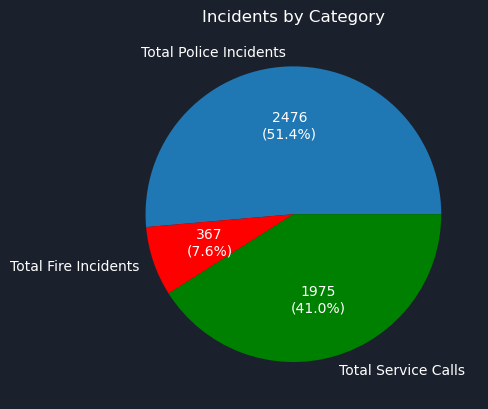

In [39]:
# Extract the total rows from each dataset
total_police = df_police.iloc[-1]['Total Police Incidents']
total_fire = df_fire.iloc[-1]['Total Fire Incidents']
total_service = df_service.iloc[-1]['Total Service Calls']

# Create a new DataFrame for the pie chart
df_totals = pd.DataFrame({
    'Category': ['Total Police Incidents', 'Total Fire Incidents', 'Total Service Calls'],
    'Total': [total_police, total_fire, total_service]
})

# Total counts
total_counts = df_totals['Total']

# Define a function to format the labels
def format_func(pct):
    total = int(round(pct/100.0*total_counts.sum()))
    return f"{total}\n({pct:.1f}%)"

# Create a pie chart
fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(total_counts, labels=df_totals['Category'], autopct=format_func)

# Set the colors of the pie chart slices
colors = ['#1f77b4', 'red', 'green']  # Adjust the colors as desired
for i, wedge in enumerate(wedges):
    wedge.set_facecolor(colors[i])
    
ax.set_title('Incidents by Category')

# Set the figure background color
fig.set_facecolor('#1b212c')
ax.set_facecolor('#1b212c')

# Set the color of the labels and title to white
ax.title.set_color('white')
for text in texts:
    text.set_color('white')
for autotext in autotexts:
    autotext.set_color('white')

plt.show()

Text(0.5, 1.0, 'Incidents by Category')

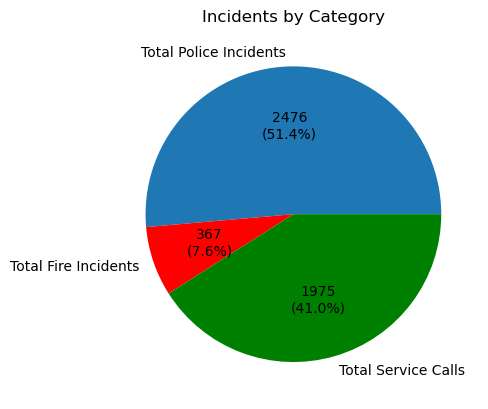

In [40]:
# Create a pie chart
fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(total_counts, labels=df_totals['Category'], autopct=format_func)

# Set the colors of the pie chart slices
colors = ['#1f77b4', 'red', 'green']  # Adjust the colors as desired
for i, wedge in enumerate(wedges):
    wedge.set_facecolor(colors[i])
    
ax.set_title('Incidents by Category')

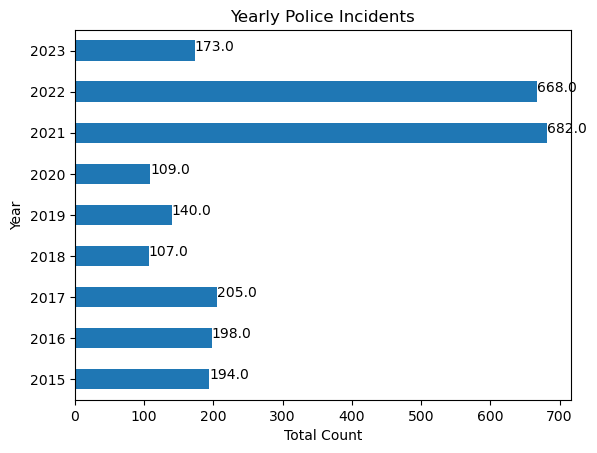

In [41]:
# Filter the 'Total' row
df_police_years = df_police.loc[['Total']]

# Drop non-numeric columns
df_police_years = df_police_years.drop(['Parcel ID', 'Address', 'Current Use', 'USPS Vacancy', 'Adjudicated Property', 'Total Police Incidents'], axis=1, errors='ignore')

# Transpose the DataFrame
df_police_years = df_police_years.transpose()

# Reset the index to have years as a column
df_police_years.reset_index(inplace=True)

# Rename the columns
df_police_years.columns = ['Year', 'Total Count']

# Extract the year from the 'Year' column
df_police_years['Year'] = df_police_years['Year'].str.extract('(\d{4})')

# Convert 'Total Count' column to numeric data type and sort by 'Total Count'
df_police_years['Total Count'] = pd.to_numeric(df_police_years['Total Count'])

# Plot the data
ax = df_police_years.plot(x='Year', y='Total Count', kind='barh', legend=False)
plt.xlabel('Total Count')
plt.title('Yearly Police Incidents')

# Add text annotations to the bars
for i, v in enumerate(df_police_years['Total Count']):
    ax.text(v, i, str(v), color='black')

# Plot the data
plt.show()

In [42]:
df_police_years

,Year,Total Count
0,2015,194.0
1,2016,198.0
2,2017,205.0
3,2018,107.0
4,2019,140.0
5,2020,109.0
6,2021,682.0
7,2022,668.0
8,2023,173.0


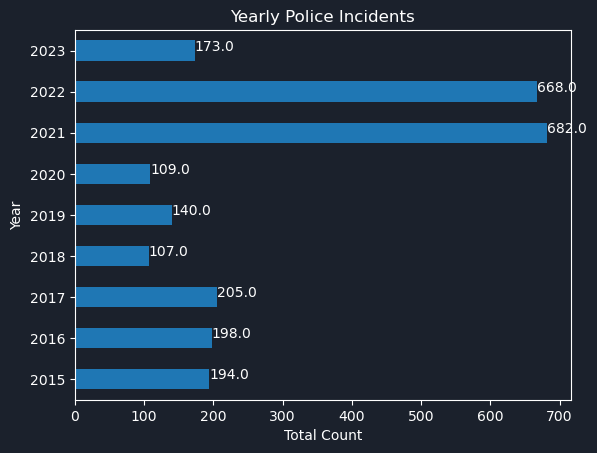

In [43]:
import matplotlib.pyplot as plt
import numpy as np

# Filter the 'Total' row
df_police_years = df_police.loc[['Total']]

# Drop non-numeric columns
df_police_years = df_police_years.drop(['Parcel ID', 'Address', 'Current Use', 'USPS Vacancy', 'Adjudicated Property', 'Total Police Incidents'], axis=1, errors='ignore')

# Transpose the DataFrame
df_police_years = df_police_years.transpose()

# Reset the index to have years as a column
df_police_years.reset_index(inplace=True)

# Rename the columns
df_police_years.columns = ['Year', 'Total Count']

# Extract the year from the 'Year' column
df_police_years['Year'] = df_police_years['Year'].str.extract('(\d{4})')

# Convert 'Total Count' column to numeric data type and sort by 'Total Count'
df_police_years['Total Count'] = pd.to_numeric(df_police_years['Total Count'])

# Plot the data on the figure
fig, ax = plt.subplots()
df_police_years.plot(x='Year', y='Total Count', kind='barh', legend=False, ax=ax)

# Customize the plot appearance
ax.set_facecolor('#1b212c')
fig.set_facecolor('#1b212c')  # <-- This changes the entire figure's background color

for spine in ax.spines.values():
    spine.set_edgecolor('white')

ax.tick_params(axis='x', colors='white')
ax.set_xlabel('Total Count', color='white')
ax.tick_params(axis='y', colors='white')
ax.set_ylabel('Year', color='white')
plt.title('Yearly Police Incidents', color='white')

# Add text annotations to the bars
for i, v in enumerate(df_police_years['Total Count']):
    ax.text(v, i, str(v), color='white')

# Display the plot
plt.show()

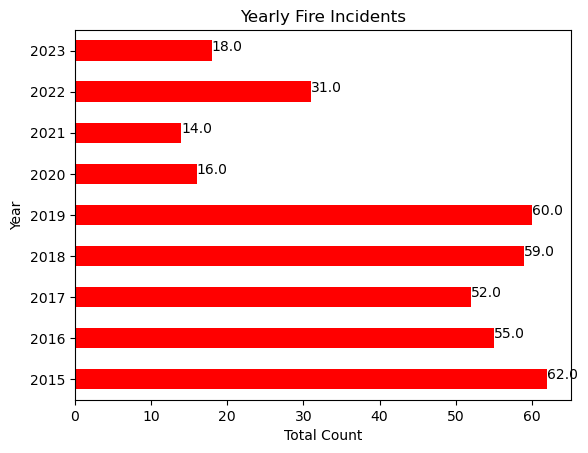

In [44]:
# Filter the 'Total' row
df_fire_years = df_fire.loc[['Total']]

# Drop non-numeric columns
df_fire_years = df_fire_years.drop(['Parcel ID', 'Address', 'Current Use', 'USPS Vacancy', 'Adjudicated Property', 'Total Fire Incidents'], axis=1, errors='ignore')

# Transpose the DataFrame
df_fire_years = df_fire_years.transpose()

# Reset the index to have years as a column
df_fire_years.reset_index(inplace=True)

# Rename the columns
df_fire_years.columns = ['Year', 'Total Count']

# Extract the year from the 'Year' column
df_fire_years['Year'] = df_fire_years['Year'].str.extract('(\d{4})')

# Convert 'Total Count' column to numeric data type and sort by 'Total Count'
df_fire_years['Total Count'] = pd.to_numeric(df_fire_years['Total Count'])

# Plot the data
ax = df_fire_years.plot(x='Year', y='Total Count', kind='barh', color='red', legend=False)
plt.xlabel('Total Count')
plt.title('Yearly Fire Incidents')

# Add text annotations to the bars
for i, v in enumerate(df_fire_years['Total Count']):
    ax.text(v, i, str(v), color='black')

# Plot the data
plt.show()

In [45]:
df_fire_years

,Year,Total Count
0,2015,62.0
1,2016,55.0
2,2017,52.0
3,2018,59.0
4,2019,60.0
5,2020,16.0
6,2021,14.0
7,2022,31.0
8,2023,18.0


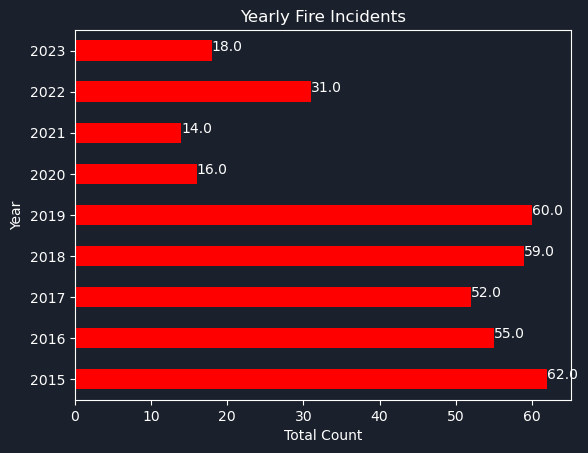

In [46]:
# Filter the 'Total' row
df_fire_years = df_fire.loc[['Total']]

# Drop non-numeric columns
df_fire_years = df_fire_years.drop(['Parcel ID', 'Address', 'Current Use', 'USPS Vacancy', 'Adjudicated Property', 'Total Fire Incidents'], axis=1, errors='ignore')

# Transpose the DataFrame
df_fire_years = df_fire_years.transpose()

# Reset the index to have years as a column
df_fire_years.reset_index(inplace=True)

# Rename the columns
df_fire_years.columns = ['Year', 'Total Count']

# Extract the year from the 'Year' column
df_fire_years['Year'] = df_fire_years['Year'].str.extract('(\d{4})')

# Convert 'Total Count' column to numeric data type and sort by 'Total Count'
df_fire_years['Total Count'] = pd.to_numeric(df_fire_years['Total Count'])

# Plot the data on the figure
fig, ax = plt.subplots()
df_fire_years.plot(x='Year', y='Total Count', kind='barh', color='red', legend=False, ax=ax)

# Customize the plot appearance
ax.set_facecolor('#1b212c')
fig.set_facecolor('#1b212c')  # <-- This changes the entire figure's background color

for spine in ax.spines.values():
    spine.set_edgecolor('white')

ax.tick_params(axis='x', colors='white')
ax.set_xlabel('Total Count', color='white')
ax.tick_params(axis='y', colors='white')
ax.set_ylabel('Year', color='white')
plt.title('Yearly Fire Incidents', color='white')

# Add text annotations to the bars
for i, v in enumerate(df_fire_years['Total Count']):
    ax.text(v, i, str(v), color='white')

# Display the plot
plt.show()

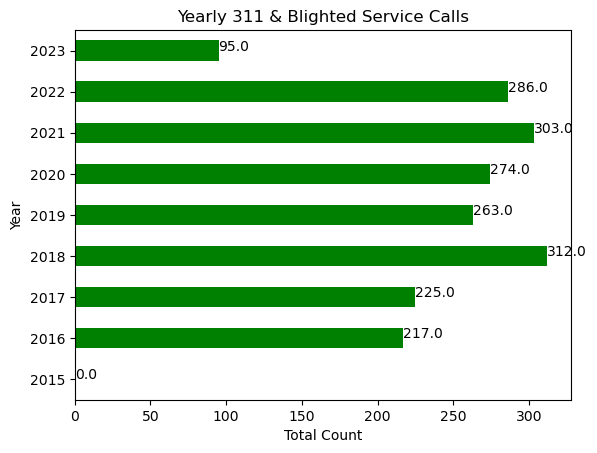

In [47]:
# Filter the 'Total' row
df_service_years = df_service.loc[['Total']]

# Drop non-numeric columns
df_service_years = df_service_years.drop(['Parcel ID', 'Address', 'Current Use', 'USPS Vacancy', 'Adjudicated Property', 'Total Service Calls'], axis=1, errors='ignore')

# Transpose the DataFrame
df_service_years = df_service_years.transpose()

# Reset the index to have years as a column
df_service_years.reset_index(inplace=True)

# Rename the columns
df_service_years.columns = ['Year', 'Total Count']

# Extract the year from the 'Year' column
df_service_years['Year'] = df_service_years['Year'].str.extract('(\d{4})')

# Convert 'Total Count' column to numeric data type and sort by 'Total Count'
df_service_years['Total Count'] = pd.to_numeric(df_service_years['Total Count'])

# Group by 'Year' and sum 'Total Count'
df_service_years = df_service_years.groupby('Year')['Total Count'].sum().reset_index()

# Plot the data
ax = df_service_years.plot(x='Year', y='Total Count', kind='barh', color='green', legend=False)
plt.xlabel('Total Count')
plt.title('Yearly 311 & Blighted Service Calls')

# Add text annotations to the bars
for i, v in enumerate(df_service_years['Total Count']):
    ax.text(v, i, str(v), color='black')

# Plot the data
plt.show()

In [48]:
df_service_years

,Year,Total Count
0,2015,0.0
1,2016,217.0
2,2017,225.0
3,2018,312.0
4,2019,263.0
5,2020,274.0
6,2021,303.0
7,2022,286.0
8,2023,95.0


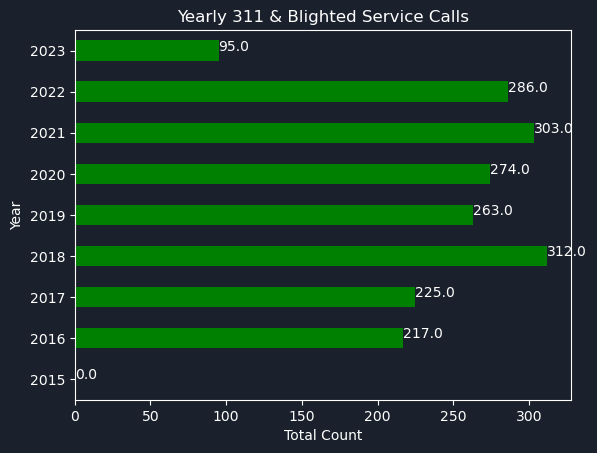

In [49]:
# Filter the 'Total' row
df_service_years = df_service.loc[['Total']]

# Drop non-numeric columns
df_service_years = df_service_years.drop(['Parcel ID', 'Address', 'Current Use', 'USPS Vacancy', 'Adjudicated Property', 'Total Service Calls'], axis=1, errors='ignore')

# Transpose the DataFrame
df_service_years = df_service_years.transpose()

# Reset the index to have years as a column
df_service_years.reset_index(inplace=True)

# Rename the columns
df_service_years.columns = ['Year', 'Total Count']

# Extract the year from the 'Year' column
df_service_years['Year'] = df_service_years['Year'].str.extract('(\d{4})')

# Convert 'Total Count' column to numeric data type and sort by 'Total Count'
df_service_years['Total Count'] = pd.to_numeric(df_service_years['Total Count'])

# Group by 'Year' and sum 'Total Count'
df_service_years = df_service_years.groupby('Year')['Total Count'].sum().reset_index()

# Plot the data on the figure
fig, ax = plt.subplots()
df_service_years.plot(x='Year', y='Total Count', kind='barh', color='green', legend=False, ax=ax)

# Customize the plot appearance
ax.set_facecolor('#1b212c')
fig.set_facecolor('#1b212c')  # <-- This changes the entire figure's background color

for spine in ax.spines.values():
    spine.set_edgecolor('white')

ax.tick_params(axis='x', colors='white')
ax.set_xlabel('Total Count', color='white')
ax.tick_params(axis='y', colors='white')
ax.set_ylabel('Year', color='white')
plt.title('Yearly 311 & Blighted Service Calls', color='white')

# Add text annotations to the bars
for i, v in enumerate(df_service_years['Total Count']):
    ax.text(v, i, str(v), color='white')

# Display the plot
plt.show()